# Validation and Inference 

In [1]:
from pathlib import Path

In [2]:
HOME = Path.cwd().parent.parent
HOME

PosixPath('/home/ubuntu_wsl/computer_vision/analog_watch_reader')

In [3]:
import torch

print(torch.cuda.is_available())

True


In [4]:
torch.tensor([0.12, 0.32]).cuda()

tensor([0.1200, 0.3200], device='cuda:0')

In [5]:
from ultralytics import YOLO

In [6]:
model_path = HOME/"models/keypoints/best_yolo11l.pt"
yaml_file_path = HOME/"src/watch_recognition/config/data.yaml"

In [7]:
print(model_path.exists())
print(yaml_file_path.exists())

True
True


In [8]:
model = YOLO(model_path)

metrics = model.val(data=yaml_file_path, plots=True)
print(metrics.box.map)

Ultralytics 8.3.179 🚀 Python-3.12.7 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1060, 6144MiB)
YOLO11l-pose summary (fused): 199 layers, 26,132,434 parameters, 0 gradients, 90.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 58.2±13.9 MB/s, size: 57.7 KB)


val: Scanning /home/ubuntu_wsl/computer_vision/analog_watch_reader/datasets/yolo/val/labels... 200 images, 0 backgrounds, 95 corrupt: 100%|██████████| 200/200 [00:00<00:00, 597.68it/s]

val: /home/ubuntu_wsl/computer_vision/analog_watch_reader/datasets/yolo/val/images/188411e0162e2e533bb3061b747ff396_jpeg.rf.0ff3357b27ef52f680fd66e1232b18df.jpg: ignoring corrupt image/label: labels require 26 columns each
val: /home/ubuntu_wsl/computer_vision/analog_watch_reader/datasets/yolo/val/images/189dae653d6b219c5d8a5189aaba320b_jpeg.rf.9ad0f5a20b43f5dda80a589b97291b27.jpg: ignoring corrupt image/label: labels require 26 columns each
val: /home/ubuntu_wsl/computer_vision/analog_watch_reader/datasets/yolo/val/images/18df4fdf9f635565dbbaa0404443ce15_jpeg.rf.d636f562e6137b56d7390e50f657febb.jpg: ignoring corrupt image/label: labels require 26 columns each
val: /home/ubuntu_wsl/computer_vision/analog_watch_reader/datasets/yolo/val/images/1939221bc45664404bd83e28e068d4bc_jpeg.rf.fada76a33ad16cae5e18a4112a3c199f.jpg: ignoring corrupt image/label: labels require 26 columns each
val: /home/ubuntu_wsl/computer_vision/analog_watch_reader/datasets/yolo/val/images/19f85ca7e6d18fc595f36b68a


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]


                   all        105        109          1          1      0.995      0.987      0.954      0.954      0.942      0.496
Speed: 3.2ms preprocess, 54.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /home/ubuntu_wsl/computer_vision/analog_time_reader/runs/pose/val10
0.9865593908924091


In [9]:
metrics

ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef186101310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034, 

In [10]:
metrics.results_dict

{'metrics/precision(B)': 1.0,
 'metrics/recall(B)': 0.9995875685871762,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.9865593908924091,
 'metrics/precision(P)': 0.9541099437369737,
 'metrics/recall(P)': 0.9537289131589973,
 'metrics/mAP50(P)': 0.9420658873591399,
 'metrics/mAP50-95(P)': 0.49616458008324005,
 'fitness': 1.5281581626139982}

In [11]:
metrics_dict = metrics.results_dict
box_metrics = {k:v for k,v in metrics_dict.items() if "(B)" in k}
pose_metrics = {k:v for k,v in metrics_dict.items() if "(P)" in k}

In [12]:
box_metrics

{'metrics/precision(B)': 1.0,
 'metrics/recall(B)': 0.9995875685871762,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.9865593908924091}

In [13]:
pose_metrics

{'metrics/precision(P)': 0.9541099437369737,
 'metrics/recall(P)': 0.9537289131589973,
 'metrics/mAP50(P)': 0.9420658873591399,
 'metrics/mAP50-95(P)': 0.49616458008324005}

In [14]:
import re

In [15]:
def clean_metrics_keys(metrics_dict):
    """Transform dictionary keys from 'metrics/precision(B)' to 'precision'."""
    cleaned = {}
    for key, value in metrics_dict.items():
        stripped = key.replace('metrics/', '')
        cleaned_key = re.sub(r'\([A-Z]\)$', '', stripped)
        cleaned[cleaned_key] = value
    return cleaned

In [16]:
clean_metrics_keys(box_metrics)

{'precision': 1.0,
 'recall': 0.9995875685871762,
 'mAP50': 0.995,
 'mAP50-95': 0.9865593908924091}

In [17]:
clean_metrics_keys(pose_metrics)

{'precision': 0.9541099437369737,
 'recall': 0.9537289131589973,
 'mAP50': 0.9420658873591399,
 'mAP50-95': 0.49616458008324005}

In [18]:
cm_df = metrics.confusion_matrix.to_df()
cm_df

,Predicted,clock,background
0,clock,108.0,0.0
1,background,1.0,0.0


In [19]:
conf_matrix = cm_df[["clock", "background"]].values
conf_matrix

array([[        108,           0],
       [          1,           0]])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

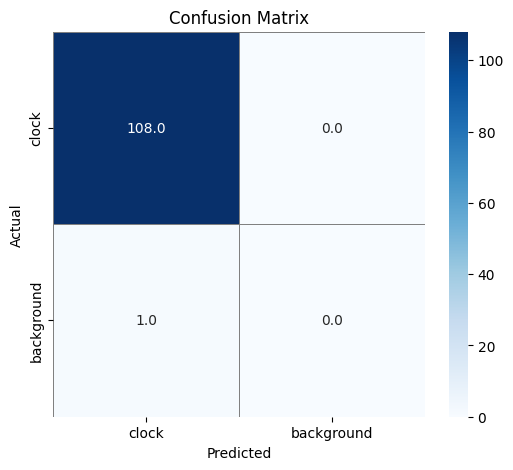

In [21]:
%matplotlib inline

class_names = ["clock", "background"]   # Labels

plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    linewidths=0.5,
    linecolor="grey"
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()